<a href="https://colab.research.google.com/github/nicol2020/UV-SINTEC/blob/master/Rectangular_or_square_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ben's code - corrected

- last correction: 04 / 01 / 2021 



In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

In [2]:
#Comment this out if using code using power density at a given height
#I = 1  #Intensity in watts

#Only use code in this cell if given the power density at a given height and need to find the initial intensity I [W]
I_zero = 3.74 #Power Density in w/m^2 at a given height h from the LED
h = 0.10 #height from the LED to the plane given for Power density
I = I_zero*(h**2) #Intensity value in W

In [3]:
z = 0.10 #Distance from LED plane to target plane in metres
dx = 0.12 #Distance between each LED in the x direction
dy = 0.10#Distance between each LED in the y direction
n = 3 #Number of LEDs in the x direction
m = 3 #Number of LEDs in the y direction


hA = 63 #LED half angle in degrees
px = 0.3 #size of plane in x direction (m)
py = 0.23 #size of plane in y direction (m)
num = 100 #Number of points desired in each direction on the plane

In [4]:
X = np.outer(1,np.linspace(0,px,num)) #Position on plane in x direction
np.round(X,4)                         
Y = np.outer(np.linspace(0,py,num),1) #Position on plane in y direction
np.round(Y,4)
x, y = np.meshgrid(X,Y) #This is required to enable the contour plot

p = -(np.log(2)/np.log(np.cos(np.radians(hA))) ) ### 
E = 0 #Set total illuminance to 0 initially
Enew = 0 #Set storage variable to zero initially to 0 initially

for j in range(1,2*m,2): #Outer loop to change the y position of the leds for each row of x positions
    ledy = -(m-j)*dy/2 +py/2 #Setting the y position of the LEDs symmetrically about the centre of the plane
    
    for i in range(1,2*n,2): #Inner loop to change the x position of the leds 
        
        Enew = E #Store the total illuminance from previous iteration
        
        ledx = -(n-i)*dx/2 +px/2 #Setting the x position of the LEDs symmetrically about the centre of the plane
        opp = np.sqrt((x-ledx)**2+(y-ledy)**2) #Calculating the parallel distance from the LED to the point on the plane
        hyp = np.sqrt(z**2 + opp**2) #Calculating the straight line distance from the LED to the point on the plane
        En = ((z**(p+1))*I ) / ((hyp**2)**((p+3)/2))
        E = En + Enew #Adding illuminance from current iteration to total

M = np.max(E) #Peak of the matrix E
#E = E/M #Creating relative illuminance with respect to the peak of E

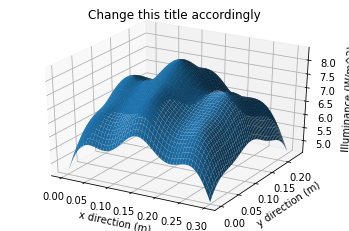

In [5]:
#Code to create a 3D plot of 2D position on the plane and total illuminance
fig = plt.figure()
ax = plt.axes(projection = '3d')

ax.plot_surface(x,y,E)
ax.set_title("Change this title accordingly")
ax.set_xlabel("x direction (m)")
ax.set_ylabel("y direction (m)")
ax.set_zlabel("Illuminance (W/m^2)")

plt.show()

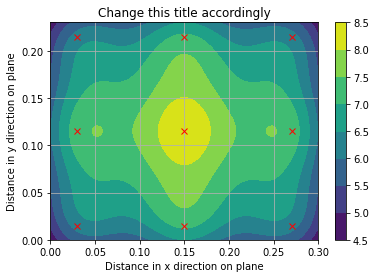

In [6]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(x,y,E)
#Code below for plotting each LED's position
for j in range(1,2*m,2):
    ledy = -(n-j)*dy/2 +py/2 
    for i in range(1,2*n,2):
        ledx = -(n-i)*dx/2 +px/2
        plt.plot(ledx,ledy,'rx')

fig.colorbar(cp)
plt.title("Change this title accordingly")
plt.xlabel("Distance in x direction on plane")
plt.ylabel("Distance in y direction on plane")
plt.grid()
